In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load and Preprocess Data
data = pd.read_csv('train.csv')

In [5]:
# Feature engineering
data = data.assign(
    AgeOfHouse = 2023 - data['YearBuilt'],
    TotalSF = data['GrLivArea'] + data['TotalBsmtSF']
)

In [7]:
# Handle missing values
data = data.fillna({
    'LotFrontage': data['LotFrontage'].median(),
    'MasVnrArea': 0
})

In [9]:
# Select features
features = ['LotArea', 'OverallQual', 'AgeOfHouse', 'TotalSF', 'FullBath', 'GarageCars']
X = data[features]
y = np.log(data['SalePrice'])

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Build Decision Tree Model
dt_reg = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

In [17]:
#Train Decision Tree Model
dt_reg.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

In [19]:
# Evaluate Model
y_pred = dt_reg.predict(X_test_scaled)

In [21]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Performance ===")
print(f"RMSE (log scale): {rmse:.4f}")
print(f"MAE (log scale): {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

=== Model Performance ===
RMSE (log scale): 0.2006
MAE (log scale): 0.1427
R2 Score: 0.7844


In [23]:
# Convert back to original price scale
actual_prices = np.exp(y_test)
predicted_prices = np.exp(y_pred)

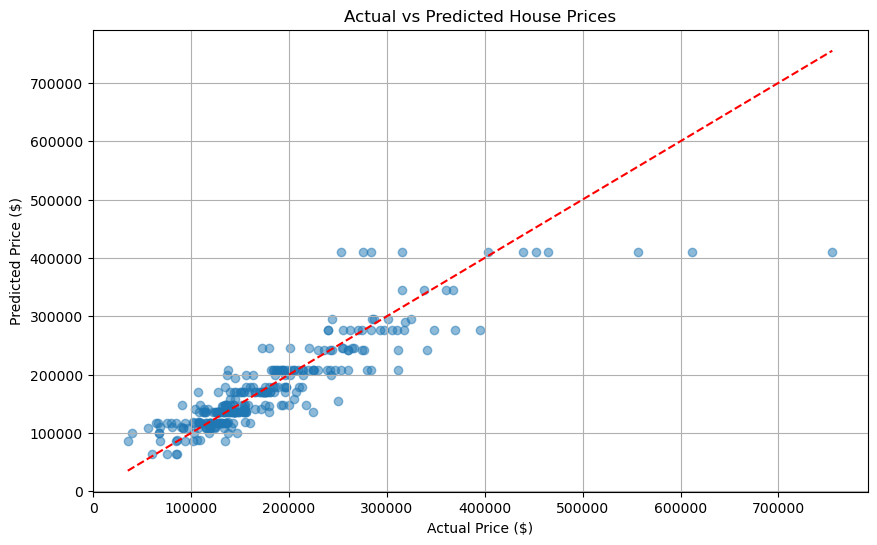

In [25]:
# Visualize Results
plt.figure(figsize=(10, 6))
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], 
         [actual_prices.min(), actual_prices.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

Sample Price Predictions:
      Actual Price  Predicted Price  Absolute Error  Percentage Error
892       154500.0        141660.16        12839.84              8.31
1105      325000.0        295462.86        29537.14              9.09
413       115000.0        136005.68        21005.68             18.27
522       159000.0        169615.08        10615.08              6.68
1036      315500.0        344142.15        28642.15              9.08
614        75500.0         64181.39        11318.61             14.99
218       311500.0        208268.37       103231.63             33.14
1160      146000.0        169615.08        23615.08             16.17
649        84500.0         64181.39        20318.61             24.05
887       135500.0        147580.56        12080.56              8.92

Overall Performance Metrics:
MAE(Mean Absolute Error): $24,969.13
RMSE(Root Mean Squared Error): $41,101.90
MAPE(Mean Absolute Percentage Error): 15.00%


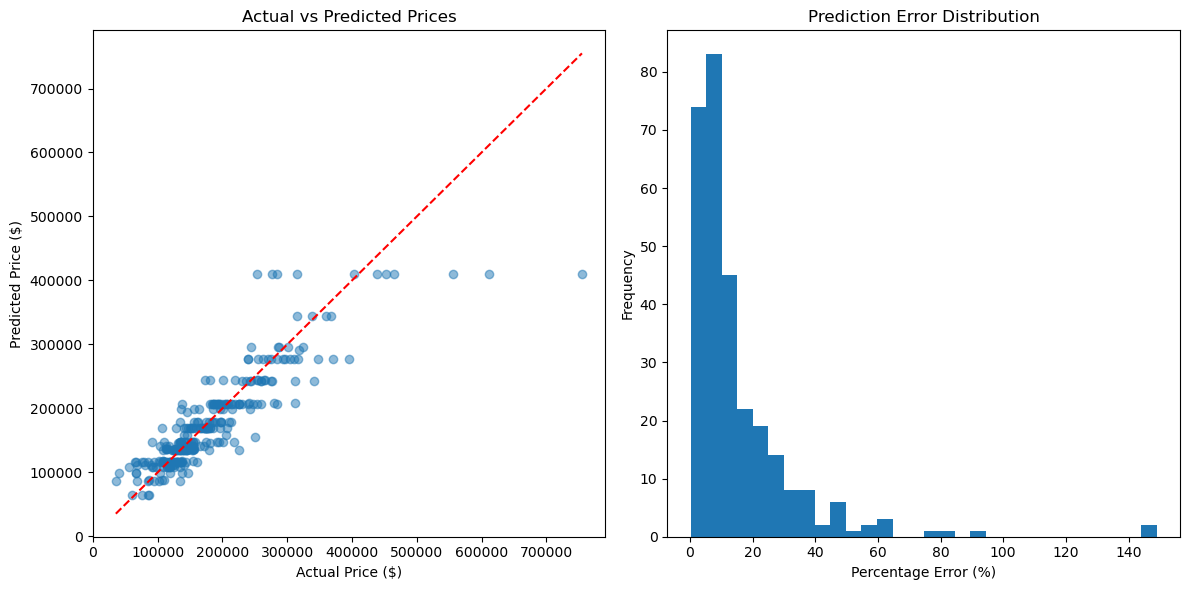

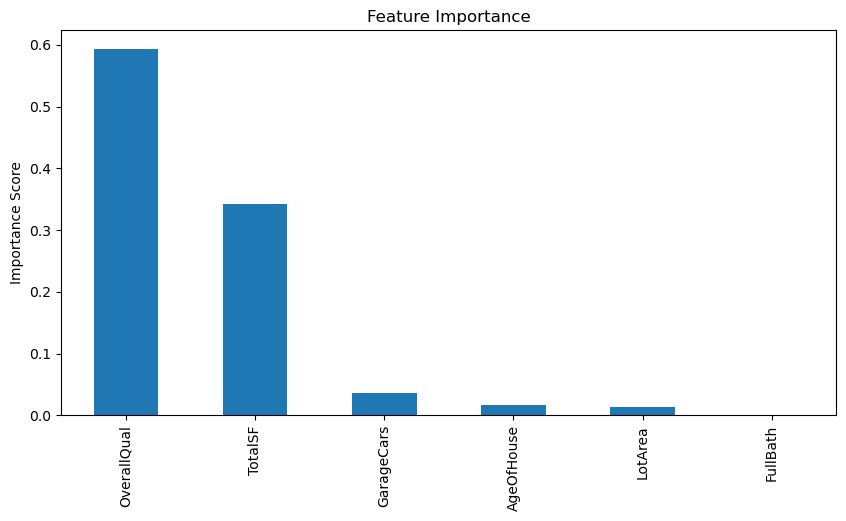

In [35]:
# Create comparison DataFrame
results_df = pd.DataFrame({
    'Actual Price': actual_prices,
    'Predicted Price': predicted_prices,
    'Absolute Error': np.abs(actual_prices - predicted_prices),
    'Percentage Error': (np.abs(actual_prices - predicted_prices) / actual_prices * 100)
})

# Display first 10 comparisons
print("Sample Price Predictions:")
print(results_df.head(10).round(2))

# Calculate overall metrics
mae = np.mean(results_df['Absolute Error'])
mape = np.mean(results_df['Percentage Error'])
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f"\nOverall Performance Metrics:")
print(f"MAE(Mean Absolute Error): ${mae:,.2f}")
print(f"RMSE(Root Mean Squared Error): ${rmse:,.2f}")
print(f"MAPE(Mean Absolute Percentage Error): {mape:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))


# Scatter plot of actual vs predicted
plt.subplot(1, 2, 1)
plt.scatter(actual_prices, predicted_prices, alpha=0.5)
plt.plot([actual_prices.min(), actual_prices.max()], 
         [actual_prices.min(), actual_prices.max()], 'r--')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')

# Error distribution
plt.subplot(1, 2, 2)
plt.hist(results_df['Percentage Error'], bins=30)
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution')

plt.tight_layout()
plt.show()

# Feature importance analysis
plt.figure(figsize=(10, 5))
feature_imp = pd.Series(dt_reg.feature_importances_, index=features).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Importance Score')
plt.show()

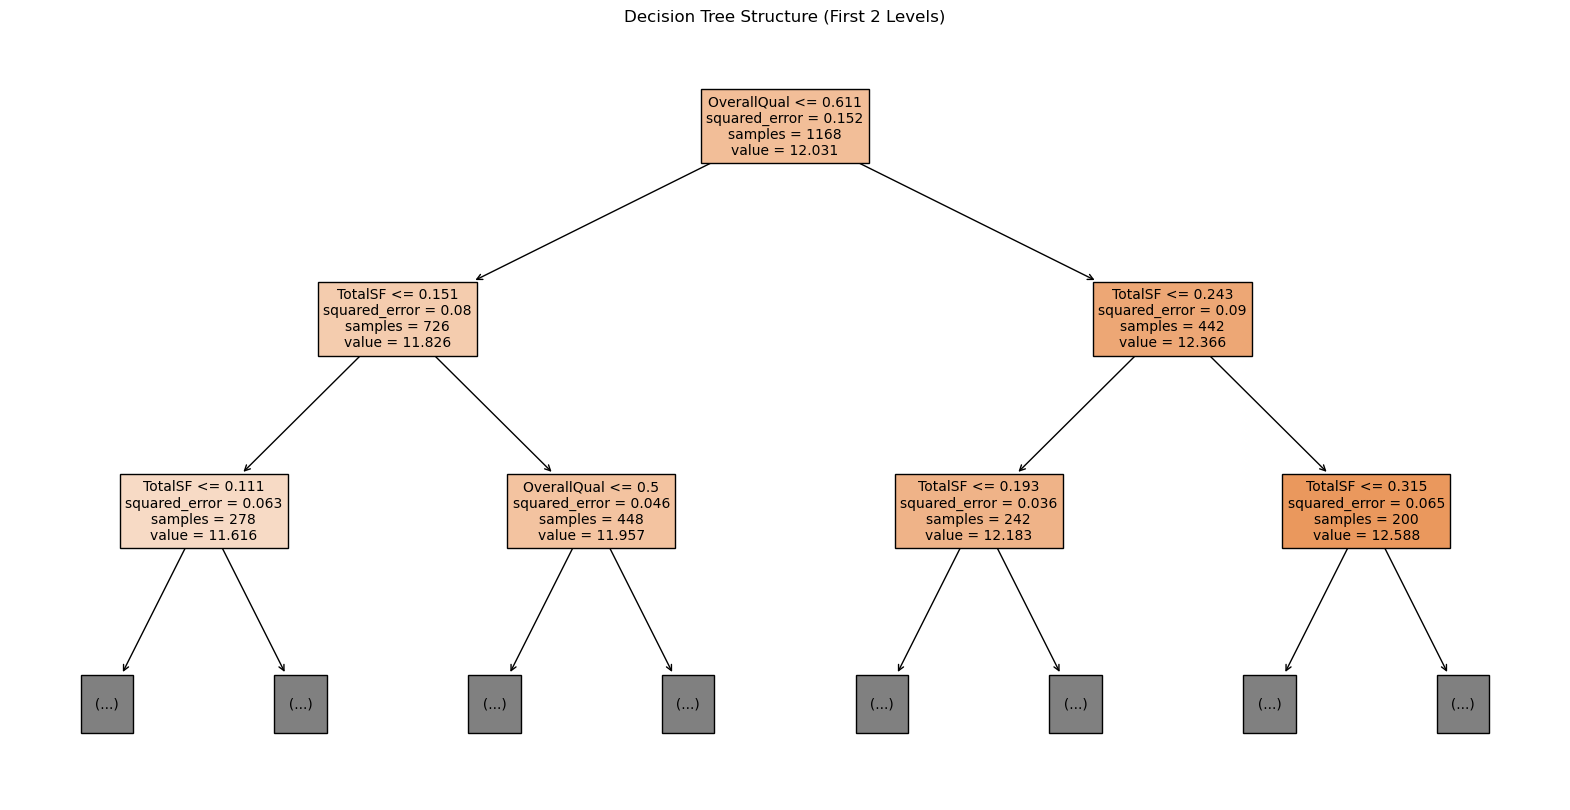

In [37]:
# Additional Decision Tree Specific Visualizations
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, 
          feature_names=features, 
          filled=True, 
          max_depth=2,  # Show first 2 levels for clarity
          fontsize=10)
plt.title('Decision Tree Structure (First 2 Levels)')
plt.show()